# **1. Datos**

## **Import**

In [3]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [4]:
#!pip install transformers

In [5]:
#!pip install nltk
# nltk.download('punkt')

In [6]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

In [7]:
t_new = pd.read_csv(r'C:\Users\bego_\Desktop\DS\bootcampPrueba\alumna\DS_TheBridgeBBK_SBIL2023\3-Machine_Learning\4-NLP\Entregas\data\tweets_newer.csv')

In [8]:
t_old = pd.read_csv(r'C:\Users\bego_\Desktop\DS\bootcampPrueba\alumna\DS_TheBridgeBBK_SBIL2023\3-Machine_Learning\4-NLP\Entregas\data\tweets_older.csv')

In [9]:
users = pd.read_csv(r'C:\Users\bego_\Desktop\DS\bootcampPrueba\alumna\DS_TheBridgeBBK_SBIL2023\3-Machine_Learning\4-NLP\Entregas\data\users.csv')

In [10]:
t_new

,id,contenido,fecha_publicacion,usuario_id,retweets,replies,likes,quotes
0,1625126689150738438,Les compartimos un mini resumen del 1º encuent...,2023-02-13 13:36:10,4899284631,0,0,2,1
1,1625165984414695426,¡Nos vamos al WorkinLan Workshop en Bilbao jun...,2023-02-13 16:12:19,1162694149956603904,2,0,1,0
2,1625813763751305216,Gracias a nuestros amigos @TheBridge_Tech por ...,2023-02-15 11:06:22,1530194743786881024,2,1,10,0
3,1625825721862987777,@BitcoinTuesday_ ¡Un placer!,2023-02-15 11:53:53,1162694149956603904,0,0,2,0
4,1625828554691805187,¿Los colores tienen género?¿podemos hacer una ...,2023-02-15 12:05:08,1162694149956603904,2,1,2,0
...,...,...,...,...,...,...,...,...
138,1658430987368386566,Así es el #bootcamp de #UXUIProductDesign que ...,2023-05-16 11:15:34,1162694149956603904,1,0,3,0
139,1658791064306688002,Nos colamos en el campus de #Bilbao para descu...,2023-05-17 11:06:23,1162694149956603904,1,0,2,0
140,1658825158994403329,"#MLMonitoring and #Observability, mar, 23 may ...",2023-05-17 13:21:52,41545659,1,0,3,0
141,1659136842854219776,¿Qué hacían nuestros alumni antes del #bootcam...,2023-05-18 10:00:23,1162694149956603904,0,0,0,0


In [11]:
t_old

,Unnamed: 0,Date,User,Tweet,Likes,Retweets,Replies
0,0,2022-05-19 15:39:16+00:00,TheBridge_Tech,¡Qué poco queda para el próximo 🔥Burn Monday🔥!...,0,2,0
1,1,2022-05-18 15:23:22+00:00,TheBridge_Tech,Esta es la historia de Isis🤗 que decidió hacer...,0,0,0
2,2,2022-05-18 11:26:31+00:00,TheBridge_Tech,Gracias @victorianoI y equipo por el análisis ...,0,0,0
3,3,2022-05-18 08:31:13+00:00,Bcasapp,¿Cómo combatir el paro juvenil🥵? #tipdeldia En...,8,4,1
4,4,2022-05-17 14:53:47+00:00,TheBridge_Tech,¿Con ganas de probar si un empleo tecnológico ...,2,2,0
...,...,...,...,...,...,...,...
129,129,2022-01-18 16:02:13+00:00,TheBridge_Tech,Del periodismo al marketing digital 🤸 esta es ...,0,0,0
130,130,2022-01-12 19:03:03+00:00,nodosenlared,Ciclo de Conferencias sobre Inteligencia Artif...,6,1,0
131,131,2022-01-09 17:23:02+00:00,ing_titiritero,Me encantaría saber que les enseñan sobre esta...,0,0,0
132,132,2022-01-08 12:10:46+00:00,cmarchena,"@cbusquets Hola, @TheBridge_Tech te da la opci...",4,0,0


In [12]:
users

,id,nombre,nombre_usuario
0,987047282,A3Sec,a3sec
1,1162694149956603904,The Bridge,TheBridge_Tech
2,41545659,Mario Lopez de Avila,nodosenlared
3,1162694149956603904,The Bridge,TheBridge_Tech
4,1162694149956603904,The Bridge,TheBridge_Tech
...,...,...,...
138,1162694149956603904,The Bridge,TheBridge_Tech
139,1162694149956603904,The Bridge,TheBridge_Tech
140,1530194743786881024,Bitcoin Tuesday,BitcoinTuesday_
141,1162694149956603904,The Bridge,TheBridge_Tech


## **Features**

In [13]:
users.rename(columns={'id': 'usuario_id'}, inplace=True)

In [14]:
users

,usuario_id,nombre,nombre_usuario
0,987047282,A3Sec,a3sec
1,1162694149956603904,The Bridge,TheBridge_Tech
2,41545659,Mario Lopez de Avila,nodosenlared
3,1162694149956603904,The Bridge,TheBridge_Tech
4,1162694149956603904,The Bridge,TheBridge_Tech
...,...,...,...
138,1162694149956603904,The Bridge,TheBridge_Tech
139,1162694149956603904,The Bridge,TheBridge_Tech
140,1530194743786881024,Bitcoin Tuesday,BitcoinTuesday_
141,1162694149956603904,The Bridge,TheBridge_Tech


In [15]:
t_new

,id,contenido,fecha_publicacion,usuario_id,retweets,replies,likes,quotes
0,1625126689150738438,Les compartimos un mini resumen del 1º encuent...,2023-02-13 13:36:10,4899284631,0,0,2,1
1,1625165984414695426,¡Nos vamos al WorkinLan Workshop en Bilbao jun...,2023-02-13 16:12:19,1162694149956603904,2,0,1,0
2,1625813763751305216,Gracias a nuestros amigos @TheBridge_Tech por ...,2023-02-15 11:06:22,1530194743786881024,2,1,10,0
3,1625825721862987777,@BitcoinTuesday_ ¡Un placer!,2023-02-15 11:53:53,1162694149956603904,0,0,2,0
4,1625828554691805187,¿Los colores tienen género?¿podemos hacer una ...,2023-02-15 12:05:08,1162694149956603904,2,1,2,0
...,...,...,...,...,...,...,...,...
138,1658430987368386566,Así es el #bootcamp de #UXUIProductDesign que ...,2023-05-16 11:15:34,1162694149956603904,1,0,3,0
139,1658791064306688002,Nos colamos en el campus de #Bilbao para descu...,2023-05-17 11:06:23,1162694149956603904,1,0,2,0
140,1658825158994403329,"#MLMonitoring and #Observability, mar, 23 may ...",2023-05-17 13:21:52,41545659,1,0,3,0
141,1659136842854219776,¿Qué hacían nuestros alumni antes del #bootcam...,2023-05-18 10:00:23,1162694149956603904,0,0,0,0


In [16]:
# Identificar filas duplicadas basadas en la columna 'tweet'
duplicados = t_new[t_new.duplicated]

# Mostrar las filas duplicadas
print(duplicados)

Empty DataFrame
Columns: [id, contenido, fecha_publicacion, usuario_id, retweets, replies, likes, quotes]
Index: []


In [17]:
t_new_merged = pd.merge(t_new, users, on='usuario_id')


In [18]:
# Identificar filas duplicadas completas
duplicados = t_new_merged[t_new_merged.duplicated()]

# Mostrar las filas duplicadas completas
print(duplicados)


                       id                                          contenido  \
1     1625126689150738438  Les compartimos un mini resumen del 1º encuent...   
2     1625126689150738438  Les compartimos un mini resumen del 1º encuent...   
4     1642864779583709188  Os compartimos un mini resumen del segundo enc...   
5     1642864779583709188  Os compartimos un mini resumen del segundo enc...   
7     1642875395090309123  @TheBridge_Tech @milmadrid_ Y si te lo perdist...   
...                   ...                                                ...   
2590  1648370663604862995  @hello_google @TheBridge_Tech Gracias Iñaki, a...   
2593  1649327786740400129  El poder de dos escuela concentrado en el 𝐁𝐨𝐨𝐭...   
2595  1655857938769092610  💯 Aprende una profesión de alta empleabilidad ...   
2598  1653343299749462017  📅 HOY #OpenDay de los BBK Bootcamps by The Bri...   
2600  1654368985578627073  🎂🎉 ¡Este mes se cumplen 10 años del primer #Be...   

        fecha_publicacion  usuario_id  

In [19]:
# Eliminar filas duplicadas completas basadas en todas las columnas
t_new_merged_ = t_new_merged.drop_duplicates()

# Mostrar información después de eliminar duplicados
print(t_new_merged_)


                       id                                          contenido  \
0     1625126689150738438  Les compartimos un mini resumen del 1º encuent...   
3     1642864779583709188  Os compartimos un mini resumen del segundo enc...   
6     1642875395090309123  @TheBridge_Tech @milmadrid_ Y si te lo perdist...   
9     1625165984414695426  ¡Nos vamos al WorkinLan Workshop en Bilbao jun...   
54    1625825721862987777                       @BitcoinTuesday_ ¡Un placer!   
...                   ...                                                ...   
2596  1651861860889550850  @TheBridge_Tech @EDEMempresarios @EDEM_uni ¿Po...   
2597  1653343299749462017  📅 HOY #OpenDay de los BBK Bootcamps by The Bri...   
2599  1654368985578627073  🎂🎉 ¡Este mes se cumplen 10 años del primer #Be...   
2601  1656678972078592006  Join our #RefugeesCode Demo Day &amp; networki...   
2602  1659514560200470559  Ayer visitamos a los alumnos de @TheBridge_Tec...   

        fecha_publicacion           usu

Convertir columnas 'Date' a AAAA-MM-DD

In [20]:
# t_new_merged_
# Convierte la columna 'Date' a formato de fecha
t_new_merged_['fecha_publicacion'] = pd.to_datetime(t_new_merged_['fecha_publicacion'])

# Formatea la columna 'Date' al formato AAAA-MM-DD
t_new_merged_['fecha_publicacion'] = t_new_merged_['fecha_publicacion'].dt.strftime('%Y-%m-%d')


C:\Users\bego_\AppData\Local\Temp\ipykernel_1072\397377502.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_new_merged_['fecha_publicacion'] = pd.to_datetime(t_new_merged_['fecha_publicacion'])
C:\Users\bego_\AppData\Local\Temp\ipykernel_1072\397377502.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_new_merged_['fecha_publicacion'] = t_new_merged_['fecha_publicacion'].dt.strftime('%Y-%m-%d')


In [21]:
t_new_merged_

,id,contenido,fecha_publicacion,usuario_id,retweets,replies,likes,quotes,nombre,nombre_usuario
0,1625126689150738438,Les compartimos un mini resumen del 1º encuent...,2023-02-13,4899284631,0,0,2,1,My Tech Plan,my_tech_plan
3,1642864779583709188,Os compartimos un mini resumen del segundo enc...,2023-04-03,4899284631,0,1,3,0,My Tech Plan,my_tech_plan
6,1642875395090309123,@TheBridge_Tech @milmadrid_ Y si te lo perdist...,2023-04-03,4899284631,0,0,0,0,My Tech Plan,my_tech_plan
9,1625165984414695426,¡Nos vamos al WorkinLan Workshop en Bilbao jun...,2023-02-13,1162694149956603904,2,0,1,0,The Bridge,TheBridge_Tech
54,1625825721862987777,@BitcoinTuesday_ ¡Un placer!,2023-02-15,1162694149956603904,0,0,2,0,The Bridge,TheBridge_Tech
...,...,...,...,...,...,...,...,...,...,...
2596,1651861860889550850,@TheBridge_Tech @EDEMempresarios @EDEM_uni ¿Po...,2023-04-28,1613113784926707712,0,1,0,0,Manu,ProductoActual1
2597,1653343299749462017,📅 HOY #OpenDay de los BBK Bootcamps by The Bri...,2023-05-02,2402179123,0,0,0,0,Jorge González Revilla,jorgegrev
2599,1654368985578627073,🎂🎉 ¡Este mes se cumplen 10 años del primer #Be...,2023-05-05,2402179123,1,0,2,1,Jorge González Revilla,jorgegrev
2601,1656678972078592006,Join our #RefugeesCode Demo Day &amp; networki...,2023-05-11,3588258623,5,1,5,3,Madrid For Refugees,Madrid4Refugees


In [22]:
# t_old
# Convierte la columna 'Date' a formato de fecha
t_old['Date'] = pd.to_datetime(t_old['Date'])

# Formatea la columna 'Date' al formato AAAA-MM-DD
t_old['Date'] = t_old['Date'].dt.strftime('%Y-%m-%d')


In [23]:
t_new_merged_.rename(columns={
    'contenido': 'tweet',
    'fecha_publicacion': 'date',
    'usuario_id': 'user_id',
    'retweets': 'rt',
    'nombre_usuario': 'user'
}, inplace=True)

C:\Users\bego_\AppData\Local\Temp\ipykernel_1072\659892097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_new_merged_.rename(columns={


In [24]:
t_new_merged_

,id,tweet,date,user_id,rt,replies,likes,quotes,nombre,user
0,1625126689150738438,Les compartimos un mini resumen del 1º encuent...,2023-02-13,4899284631,0,0,2,1,My Tech Plan,my_tech_plan
3,1642864779583709188,Os compartimos un mini resumen del segundo enc...,2023-04-03,4899284631,0,1,3,0,My Tech Plan,my_tech_plan
6,1642875395090309123,@TheBridge_Tech @milmadrid_ Y si te lo perdist...,2023-04-03,4899284631,0,0,0,0,My Tech Plan,my_tech_plan
9,1625165984414695426,¡Nos vamos al WorkinLan Workshop en Bilbao jun...,2023-02-13,1162694149956603904,2,0,1,0,The Bridge,TheBridge_Tech
54,1625825721862987777,@BitcoinTuesday_ ¡Un placer!,2023-02-15,1162694149956603904,0,0,2,0,The Bridge,TheBridge_Tech
...,...,...,...,...,...,...,...,...,...,...
2596,1651861860889550850,@TheBridge_Tech @EDEMempresarios @EDEM_uni ¿Po...,2023-04-28,1613113784926707712,0,1,0,0,Manu,ProductoActual1
2597,1653343299749462017,📅 HOY #OpenDay de los BBK Bootcamps by The Bri...,2023-05-02,2402179123,0,0,0,0,Jorge González Revilla,jorgegrev
2599,1654368985578627073,🎂🎉 ¡Este mes se cumplen 10 años del primer #Be...,2023-05-05,2402179123,1,0,2,1,Jorge González Revilla,jorgegrev
2601,1656678972078592006,Join our #RefugeesCode Demo Day &amp; networki...,2023-05-11,3588258623,5,1,5,3,Madrid For Refugees,Madrid4Refugees


In [25]:
t_old.rename(columns={
    'Date': 'date',
    'User': 'user',
    'Tweet': 'tweet',
    'Likes': 'likes',
    'Retweets': 'rt',
    'Replies': 'replies'
}, inplace=True)


In [26]:
t_old

,Unnamed: 0,date,user,tweet,likes,rt,replies
0,0,2022-05-19,TheBridge_Tech,¡Qué poco queda para el próximo 🔥Burn Monday🔥!...,0,2,0
1,1,2022-05-18,TheBridge_Tech,Esta es la historia de Isis🤗 que decidió hacer...,0,0,0
2,2,2022-05-18,TheBridge_Tech,Gracias @victorianoI y equipo por el análisis ...,0,0,0
3,3,2022-05-18,Bcasapp,¿Cómo combatir el paro juvenil🥵? #tipdeldia En...,8,4,1
4,4,2022-05-17,TheBridge_Tech,¿Con ganas de probar si un empleo tecnológico ...,2,2,0
...,...,...,...,...,...,...,...
129,129,2022-01-18,TheBridge_Tech,Del periodismo al marketing digital 🤸 esta es ...,0,0,0
130,130,2022-01-12,nodosenlared,Ciclo de Conferencias sobre Inteligencia Artif...,6,1,0
131,131,2022-01-09,ing_titiritero,Me encantaría saber que les enseñan sobre esta...,0,0,0
132,132,2022-01-08,cmarchena,"@cbusquets Hola, @TheBridge_Tech te da la opci...",4,0,0


### Concat

In [27]:
t_concat = pd.concat([t_old, t_new_merged_])

In [28]:
t_concat

,Unnamed: 0,date,user,tweet,likes,rt,replies,id,user_id,quotes,nombre
0,0.0,2022-05-19,TheBridge_Tech,¡Qué poco queda para el próximo 🔥Burn Monday🔥!...,0,2,0,NaN,NaN,NaN,NaN
1,1.0,2022-05-18,TheBridge_Tech,Esta es la historia de Isis🤗 que decidió hacer...,0,0,0,NaN,NaN,NaN,NaN
2,2.0,2022-05-18,TheBridge_Tech,Gracias @victorianoI y equipo por el análisis ...,0,0,0,NaN,NaN,NaN,NaN
3,3.0,2022-05-18,Bcasapp,¿Cómo combatir el paro juvenil🥵? #tipdeldia En...,8,4,1,NaN,NaN,NaN,NaN
4,4.0,2022-05-17,TheBridge_Tech,¿Con ganas de probar si un empleo tecnológico ...,2,2,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2596,NaN,2023-04-28,ProductoActual1,@TheBridge_Tech @EDEMempresarios @EDEM_uni ¿Po...,0,0,1,1.651862e+18,1.613114e+18,0.0,Manu
2597,NaN,2023-05-02,jorgegrev,📅 HOY #OpenDay de los BBK Bootcamps by The Bri...,0,0,0,1.653343e+18,2.402179e+09,0.0,Jorge González Revilla
2599,NaN,2023-05-05,jorgegrev,🎂🎉 ¡Este mes se cumplen 10 años del primer #Be...,2,1,0,1.654369e+18,2.402179e+09,1.0,Jorge González Revilla
2601,NaN,2023-05-11,Madrid4Refugees,Join our #RefugeesCode Demo Day &amp; networki...,5,5,1,1.656679e+18,3.588259e+09,3.0,Madrid For Refugees


In [29]:
#Eliminar columnas
t_concat.drop(['Unnamed: 0', 'quotes', 'id'], axis=1, inplace=True)


In [30]:
t_concat

,date,user,tweet,likes,rt,replies,user_id,nombre
0,2022-05-19,TheBridge_Tech,¡Qué poco queda para el próximo 🔥Burn Monday🔥!...,0,2,0,NaN,NaN
1,2022-05-18,TheBridge_Tech,Esta es la historia de Isis🤗 que decidió hacer...,0,0,0,NaN,NaN
2,2022-05-18,TheBridge_Tech,Gracias @victorianoI y equipo por el análisis ...,0,0,0,NaN,NaN
3,2022-05-18,Bcasapp,¿Cómo combatir el paro juvenil🥵? #tipdeldia En...,8,4,1,NaN,NaN
4,2022-05-17,TheBridge_Tech,¿Con ganas de probar si un empleo tecnológico ...,2,2,0,NaN,NaN
...,...,...,...,...,...,...,...,...
2596,2023-04-28,ProductoActual1,@TheBridge_Tech @EDEMempresarios @EDEM_uni ¿Po...,0,0,1,1.613114e+18,Manu
2597,2023-05-02,jorgegrev,📅 HOY #OpenDay de los BBK Bootcamps by The Bri...,0,0,0,2.402179e+09,Jorge González Revilla
2599,2023-05-05,jorgegrev,🎂🎉 ¡Este mes se cumplen 10 años del primer #Be...,2,1,0,2.402179e+09,Jorge González Revilla
2601,2023-05-11,Madrid4Refugees,Join our #RefugeesCode Demo Day &amp; networki...,5,5,1,3.588259e+09,Madrid For Refugees


### NaN

In [31]:
# Obtener una lista de usuarios únicos en la columna 'user'
unique_users = t_concat['user'].unique()

# Iterar a través de cada usuario único en la lista
for user in unique_users:
    # Verificar si el usuario no es NaN
    if pd.notnull(user):
        # Obtener los valores de 'user_id' para el usuario actual y eliminar los NaN
        user_id_values = t_concat.loc[t_concat['user'] == user, 'user_id'].dropna()
        
        # Si existen valores de 'user_id' para el usuario actual
        if not user_id_values.empty:
            # Tomar el primer valor de 'user_id' para ese usuario
            user_id = user_id_values.iloc[0]
            
            # Llenar las filas donde 'user' es el usuario actual y 'user_id' es NaN con el valor de 'user_id' obtenido
            t_concat.loc[(t_concat['user'] == user) & t_concat['user_id'].isnull(), 'user_id'] = user_id


In [32]:
t_concat

,date,user,tweet,likes,rt,replies,user_id,nombre
0,2022-05-19,TheBridge_Tech,¡Qué poco queda para el próximo 🔥Burn Monday🔥!...,0,2,0,1.162694e+18,NaN
1,2022-05-18,TheBridge_Tech,Esta es la historia de Isis🤗 que decidió hacer...,0,0,0,1.162694e+18,NaN
2,2022-05-18,TheBridge_Tech,Gracias @victorianoI y equipo por el análisis ...,0,0,0,1.162694e+18,NaN
3,2022-05-18,Bcasapp,¿Cómo combatir el paro juvenil🥵? #tipdeldia En...,8,4,1,NaN,NaN
4,2022-05-17,TheBridge_Tech,¿Con ganas de probar si un empleo tecnológico ...,2,2,0,1.162694e+18,NaN
...,...,...,...,...,...,...,...,...
2596,2023-04-28,ProductoActual1,@TheBridge_Tech @EDEMempresarios @EDEM_uni ¿Po...,0,0,1,1.613114e+18,Manu
2597,2023-05-02,jorgegrev,📅 HOY #OpenDay de los BBK Bootcamps by The Bri...,0,0,0,2.402179e+09,Jorge González Revilla
2599,2023-05-05,jorgegrev,🎂🎉 ¡Este mes se cumplen 10 años del primer #Be...,2,1,0,2.402179e+09,Jorge González Revilla
2601,2023-05-11,Madrid4Refugees,Join our #RefugeesCode Demo Day &amp; networki...,5,5,1,3.588259e+09,Madrid For Refugees


In [33]:
unique_users = t_concat['user'].unique()

for user in unique_users:
    if pd.notnull(user):
        nombre_values = t_concat.loc[t_concat['user'] == user, 'nombre'].dropna()
        if not nombre_values.empty:
            nombre = nombre_values.iloc[0]
            t_concat.loc[(t_concat['user'] == user) & t_concat['nombre'].isnull(), 'nombre'] = nombre


In [34]:
t_concat

,date,user,tweet,likes,rt,replies,user_id,nombre
0,2022-05-19,TheBridge_Tech,¡Qué poco queda para el próximo 🔥Burn Monday🔥!...,0,2,0,1.162694e+18,The Bridge
1,2022-05-18,TheBridge_Tech,Esta es la historia de Isis🤗 que decidió hacer...,0,0,0,1.162694e+18,The Bridge
2,2022-05-18,TheBridge_Tech,Gracias @victorianoI y equipo por el análisis ...,0,0,0,1.162694e+18,The Bridge
3,2022-05-18,Bcasapp,¿Cómo combatir el paro juvenil🥵? #tipdeldia En...,8,4,1,NaN,NaN
4,2022-05-17,TheBridge_Tech,¿Con ganas de probar si un empleo tecnológico ...,2,2,0,1.162694e+18,The Bridge
...,...,...,...,...,...,...,...,...
2596,2023-04-28,ProductoActual1,@TheBridge_Tech @EDEMempresarios @EDEM_uni ¿Po...,0,0,1,1.613114e+18,Manu
2597,2023-05-02,jorgegrev,📅 HOY #OpenDay de los BBK Bootcamps by The Bri...,0,0,0,2.402179e+09,Jorge González Revilla
2599,2023-05-05,jorgegrev,🎂🎉 ¡Este mes se cumplen 10 años del primer #Be...,2,1,0,2.402179e+09,Jorge González Revilla
2601,2023-05-11,Madrid4Refugees,Join our #RefugeesCode Demo Day &amp; networki...,5,5,1,3.588259e+09,Madrid For Refugees


In [35]:
t_concat.isnull().sum()

date        0
user        0
tweet       0
likes       0
rt          0
replies     0
user_id    79
nombre     79
dtype: int64

In [36]:
t_concat = t_concat.fillna('')

In [37]:
t_concat

,date,user,tweet,likes,rt,replies,user_id,nombre
0,2022-05-19,TheBridge_Tech,¡Qué poco queda para el próximo 🔥Burn Monday🔥!...,0,2,0,1162694149956603904.0,The Bridge
1,2022-05-18,TheBridge_Tech,Esta es la historia de Isis🤗 que decidió hacer...,0,0,0,1162694149956603904.0,The Bridge
2,2022-05-18,TheBridge_Tech,Gracias @victorianoI y equipo por el análisis ...,0,0,0,1162694149956603904.0,The Bridge
3,2022-05-18,Bcasapp,¿Cómo combatir el paro juvenil🥵? #tipdeldia En...,8,4,1,,
4,2022-05-17,TheBridge_Tech,¿Con ganas de probar si un empleo tecnológico ...,2,2,0,1162694149956603904.0,The Bridge
...,...,...,...,...,...,...,...,...
2596,2023-04-28,ProductoActual1,@TheBridge_Tech @EDEMempresarios @EDEM_uni ¿Po...,0,0,1,1613113784926707712.0,Manu
2597,2023-05-02,jorgegrev,📅 HOY #OpenDay de los BBK Bootcamps by The Bri...,0,0,0,2402179123.0,Jorge González Revilla
2599,2023-05-05,jorgegrev,🎂🎉 ¡Este mes se cumplen 10 años del primer #Be...,2,1,0,2402179123.0,Jorge González Revilla
2601,2023-05-11,Madrid4Refugees,Join our #RefugeesCode Demo Day &amp; networki...,5,5,1,3588258623.0,Madrid For Refugees


# **2. SQL**

Almacenarlos en una base de datos SQL en 2 tablas normalizadas: (tweets, 
usuarios)

In [38]:
# Ruta donde se creará la base de datos 'tweets_usuarios'
#database_path = r'C:\Users\bego_\Desktop\DS\bootcampPrueba\alumna\DS_TheBridgeBBK_SBIL2023\3-Machine_Learning\4-NLP\Entregas\sql\tweets_usuarios.db'

# Conectar (se crea el arch)
#conexion = sqlite3.connect(database_path)

# Guardar los datos en la bdd
#with conexion:
    # Guardar en la tabla 'usuarios'
 #   t_concat[['user', 'user_id', 'nombre']].drop_duplicates().to_sql('usuarios', conexion, if_exists='append', index=False)

    # Guardar en la tabla 'tweets'
  #  t_concat[['tweet', 'date', 'likes', 'rt', 'replies']].to_sql('tweets', conexion, if_exists='append', index=False)

# Cerrar la conexión
#conexion.close()


# **3. Análisis**

In [39]:
# Resetear el índice del DataFrame
t_concat.reset_index(drop=True, inplace=True)


In [40]:
t_concat

,date,user,tweet,likes,rt,replies,user_id,nombre
0,2022-05-19,TheBridge_Tech,¡Qué poco queda para el próximo 🔥Burn Monday🔥!...,0,2,0,1162694149956603904.0,The Bridge
1,2022-05-18,TheBridge_Tech,Esta es la historia de Isis🤗 que decidió hacer...,0,0,0,1162694149956603904.0,The Bridge
2,2022-05-18,TheBridge_Tech,Gracias @victorianoI y equipo por el análisis ...,0,0,0,1162694149956603904.0,The Bridge
3,2022-05-18,Bcasapp,¿Cómo combatir el paro juvenil🥵? #tipdeldia En...,8,4,1,,
4,2022-05-17,TheBridge_Tech,¿Con ganas de probar si un empleo tecnológico ...,2,2,0,1162694149956603904.0,The Bridge
...,...,...,...,...,...,...,...,...
272,2023-04-28,ProductoActual1,@TheBridge_Tech @EDEMempresarios @EDEM_uni ¿Po...,0,0,1,1613113784926707712.0,Manu
273,2023-05-02,jorgegrev,📅 HOY #OpenDay de los BBK Bootcamps by The Bri...,0,0,0,2402179123.0,Jorge González Revilla
274,2023-05-05,jorgegrev,🎂🎉 ¡Este mes se cumplen 10 años del primer #Be...,2,1,0,2402179123.0,Jorge González Revilla
275,2023-05-11,Madrid4Refugees,Join our #RefugeesCode Demo Day &amp; networki...,5,5,1,3588258623.0,Madrid For Refugees


- **¿Cuál es el tweet con mayor repercusión social?**

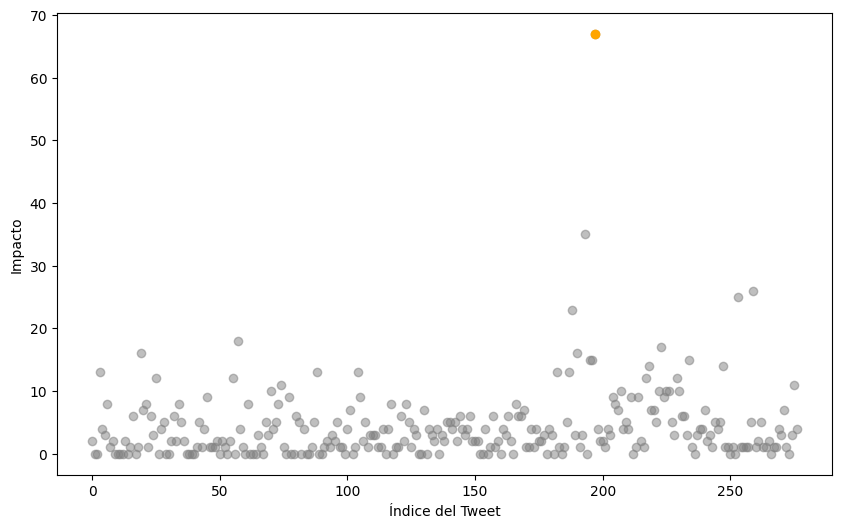

El tweet con mayor repercusión social es:
Para reactivarse!!!
Tenemos Meetup este martes 11 de abril a las 19:00 en @TheBridge_Tech

@dev7ba nos hablará sobre la mempool!!
Charla para todo el mundo, sepas o no sobre #Bitcoin 

@GaboHBeaumont @kilrau @libertariadora @olya_borderless
https://t.co/bHzpDduIRo

Se agradece RT


In [41]:
# Calcular la métrica de impacto
t_concat['impact'] = t_concat['likes'] + t_concat['rt'] + t_concat['replies']

# Encontrar el índice del tweet con mayor impacto
max_impact_tweet_index = t_concat['impact'].idxmax()

# Graficar la distribución de la métrica de impacto
plt.figure(figsize=(10, 6))
plt.scatter(t_concat.index, t_concat['impact'], alpha=0.5, color='gray', label='Otros Tweets')
plt.scatter(max_impact_tweet_index, t_concat.loc[max_impact_tweet_index, 'impact'], color='orange', label='Tweet con mayor impacto')
plt.xlabel('Índice del Tweet')
plt.ylabel('Impacto')
plt.grid(False)
plt.show()

max_impact_tweet = t_concat.loc[max_impact_tweet_index, 'tweet']
print("El tweet con mayor repercusión social es:")
print(max_impact_tweet)



- **¿Cuál es el usuario que más menciona a la escuela?**

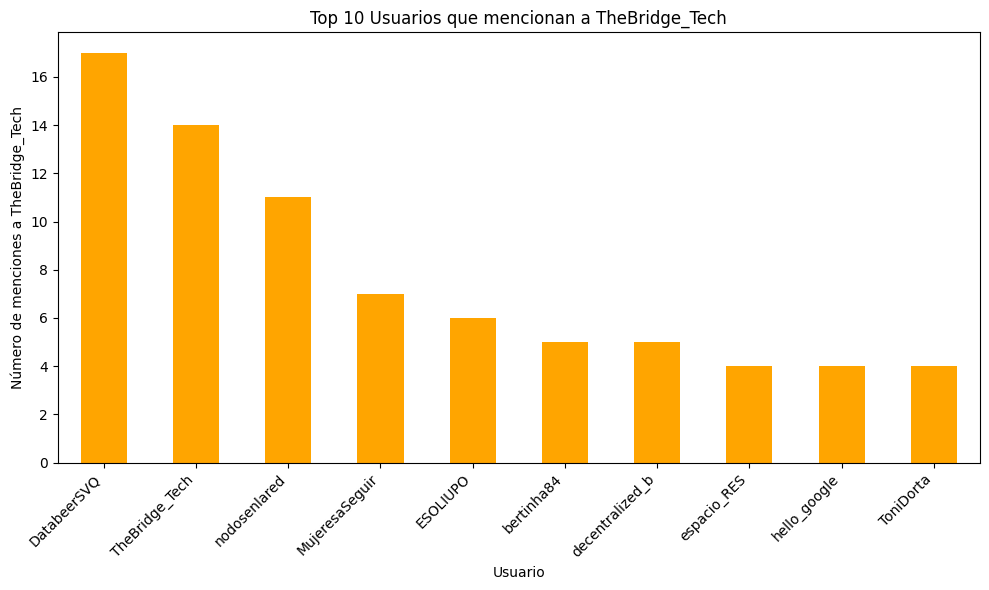

El usuario que más menciona a la escuela es:
DatabeerSVQ


In [42]:
# Contar la frecuencia de menciones de 'TheBridge_Tech' por usuario
mentions_count = t_concat[t_concat['tweet'].str.contains('TheBridge_Tech', case=False, na=False)]
mentions_by_user = mentions_count.groupby('user').size().sort_values(ascending=False)

# Tomar los 10 usuarios con más menciones
top_users = mentions_by_user.head(10)

# Visualizar en gráfico de barras
plt.figure(figsize=(10, 6))
top_users.plot(kind='bar', color='orange')
plt.xlabel('Usuario')
plt.ylabel('Número de menciones a TheBridge_Tech')
plt.title('Top 10 Usuarios que mencionan a TheBridge_Tech')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("El usuario que más menciona a la escuela es:")
print(top_users.index[0])



- **¿En qué mes se concentra el mayor número de tweets?**

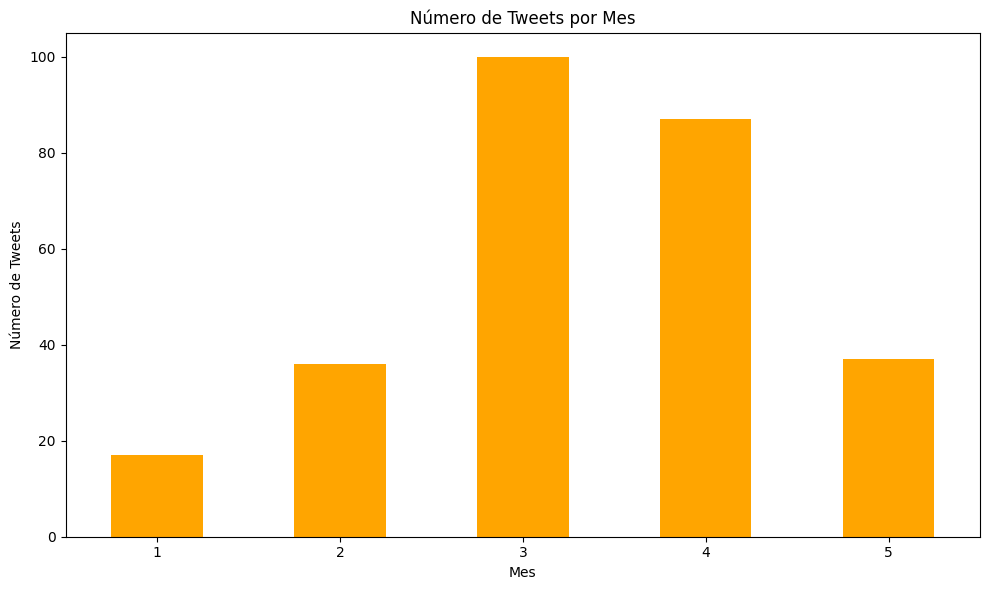

El mes con mayor número de tweets es el mes número 3.


In [43]:
# Convertir la columna 'date' a formato de fecha
t_concat['date'] = pd.to_datetime(t_concat['date'])

# Extraer el mes de cada fecha
t_concat['month'] = t_concat['date'].dt.month

# Contar los tweets por mes
tweets_per_month = t_concat.groupby('month').size()

# Encontrar el mes con mayor número de tweets
max_tweets_month = tweets_per_month.idxmax()

# Graficar el número de tweets por mes
plt.figure(figsize=(10, 6))
tweets_per_month.plot(kind='bar', color='orange')
plt.xlabel('Mes')
plt.ylabel('Número de Tweets')
plt.title('Número de Tweets por Mes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print(f"El mes con mayor número de tweets es el mes número {max_tweets_month}.")


- **¿Qué palabras son más frecuentes?**

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bego_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bego_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


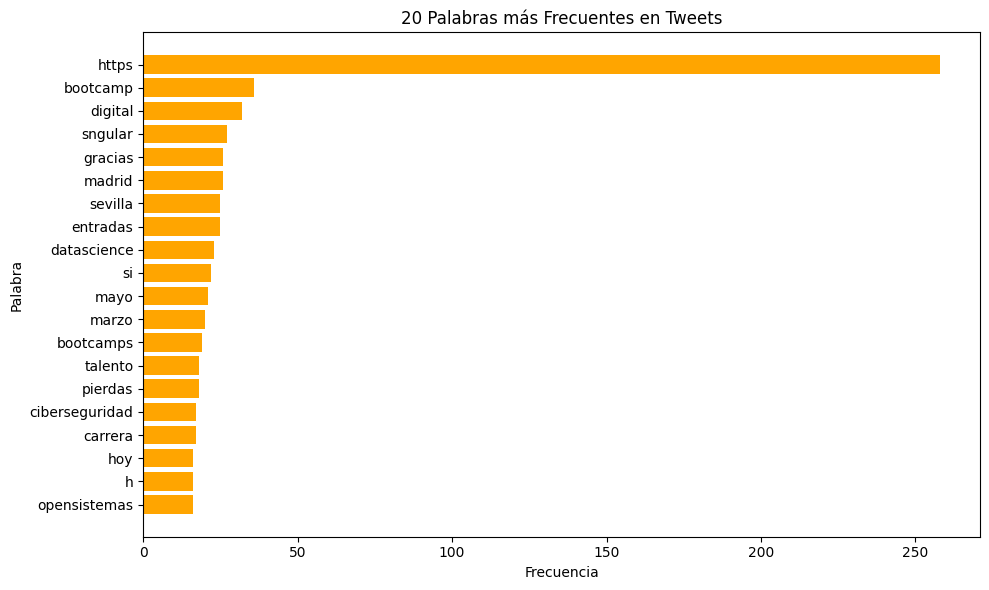

In [44]:
# Descargar los recursos de NLTK (solo la primera vez)
nltk.download('punkt')
nltk.download('stopwords')

# Unir todos los tweets en un solo texto
all_tweets = ' '.join(t_concat['tweet'].dropna())

# Tokenizar el texto en palabras
words = word_tokenize(all_tweets.lower())  # Convertir a minúsculas para contar correctamente

# Eliminar stopwords (palabras comunes que no aportan mucho significado)
stop_words = set(stopwords.words('spanish'))  # O el idioma correspondiente
filtered_words = [word for word in words if word.isalpha() and word not in stop_words]

# Contar la frecuencia de las palabras
word_freq = Counter(filtered_words)

# Tomar las 20 palabras más frecuentes
top_words = word_freq.most_common(20)

# Preparar datos para el gráfico
top_words, frequencies = zip(*top_words)

# Graficar las palabras más frecuentes
plt.figure(figsize=(10, 6))
plt.barh(top_words, frequencies, color='orange')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('20 Palabras más Frecuentes en Tweets')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la palabra más frecuente arriba
plt.tight_layout()
plt.show()


- **¿Qué tipo de correlación matemática encuentras entre las métricas públicas?**

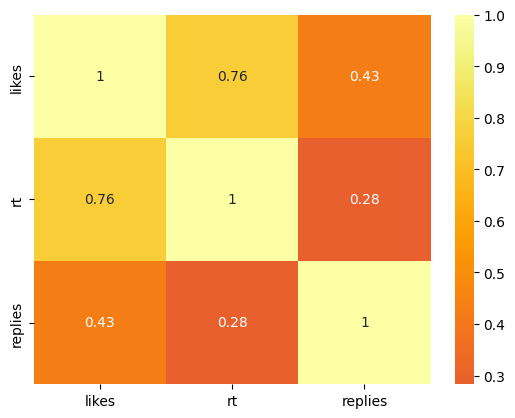

In [45]:
# Seleccionar las métricas para analizar
metrics = ['likes', 'rt', 'replies']

# Filtrar el DataFrame para quitar filas con valores nulos en estas métricas
filtered_data = t_concat.dropna(subset=metrics)

# Calcular el coeficiente de correlación de Pearson
correlation_matrix = filtered_data[metrics].corr()

# Visualizar la matriz de correlación como un mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', center=0)
plt.show()


Correlación lineal alta (0,76%) entre 'likes' y 'rt'. Correlación positiva más baja en las otras combinaciones.

- **¿Has sacado alguna conclusión extra en tu análisis?**

- El usuario 'DatabeerSVQ' destaca por su alta frecuencia de menciones a 'TheBridge_Tech'. Esto puede indicar una conexión relevante entre este usuario y la escuela, posiblemente relacionada con eventos, colaboraciones o interacciones específicas.

- Marzo fue el mes con más actividad, seguido de abril, lo que podría ser indicativo de inicio o finales de cursos, eventos relevantes, lanzamientos o campañas durante ese periodo.

- La presencia recurrente del términos "https" indica una alta inclusión de enlaces en los tweets. 

- Se identifica una correlación significativa entre 'likes' y 'rt' (retweets), indicando que los tweets populares tienden a recibir más retweets. Sin embargo, las otras correlaciones entre 'likes', 'rt' y 'replies' son más débiles, lo que indica relaciones menos directas entre estas métricas.

In [46]:
t_concat

,date,user,tweet,likes,rt,replies,user_id,nombre,impact,month
0,2022-05-19,TheBridge_Tech,¡Qué poco queda para el próximo 🔥Burn Monday🔥!...,0,2,0,1162694149956603904.0,The Bridge,2,5
1,2022-05-18,TheBridge_Tech,Esta es la historia de Isis🤗 que decidió hacer...,0,0,0,1162694149956603904.0,The Bridge,0,5
2,2022-05-18,TheBridge_Tech,Gracias @victorianoI y equipo por el análisis ...,0,0,0,1162694149956603904.0,The Bridge,0,5
3,2022-05-18,Bcasapp,¿Cómo combatir el paro juvenil🥵? #tipdeldia En...,8,4,1,,,13,5
4,2022-05-17,TheBridge_Tech,¿Con ganas de probar si un empleo tecnológico ...,2,2,0,1162694149956603904.0,The Bridge,4,5
...,...,...,...,...,...,...,...,...,...,...
272,2023-04-28,ProductoActual1,@TheBridge_Tech @EDEMempresarios @EDEM_uni ¿Po...,0,0,1,1613113784926707712.0,Manu,1,4
273,2023-05-02,jorgegrev,📅 HOY #OpenDay de los BBK Bootcamps by The Bri...,0,0,0,2402179123.0,Jorge González Revilla,0,5
274,2023-05-05,jorgegrev,🎂🎉 ¡Este mes se cumplen 10 años del primer #Be...,2,1,0,2402179123.0,Jorge González Revilla,3,5
275,2023-05-11,Madrid4Refugees,Join our #RefugeesCode Demo Day &amp; networki...,5,5,1,3588258623.0,Madrid For Refugees,11,5


# **4. Modelo**

Utiliza el modelo pre entrenado que se te ha facilitado de análisis de sentimiento para determinar el sentimiento de los tweets. 

In [47]:
# Ruta del archivo del modelo
model_path = r'C:\Users\bego_\Desktop\DS\bootcampPrueba\alumna\DS_TheBridgeBBK_SBIL2023\3-Machine_Learning\4-NLP\Entregas\model\sentiment_model'  # Reemplaza con el nombre y la ubicación correcta del archivo del modelo

# Cargar el modelo
sent_model = joblib.load(model_path)

c:\Users\bego_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator CountVectorizer from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\bego_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\bego_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle es

**a) ¿Cuáles son las predicciones? Interpreta los resultados.**

In [48]:
# Crear una nueva columna 'sentimiento_predicho' para almacenar las predicciones de sentimiento
t_concat['sentimiento_predicho'] = t_concat['tweet'].apply(lambda x: sent_model.predict([x])[0])

# Mostrar el DataFrame con las predicciones de sentimiento
print(t_concat[['tweet', 'sentimiento_predicho']])


                                                 tweet  sentimiento_predicho
0    ¡Qué poco queda para el próximo 🔥Burn Monday🔥!...                     1
1    Esta es la historia de Isis🤗 que decidió hacer...                     1
2    Gracias @victorianoI y equipo por el análisis ...                     1
3    ¿Cómo combatir el paro juvenil🥵? #tipdeldia En...                     0
4    ¿Con ganas de probar si un empleo tecnológico ...                     1
..                                                 ...                   ...
272  @TheBridge_Tech @EDEMempresarios @EDEM_uni ¿Po...                     0
273  📅 HOY #OpenDay de los BBK Bootcamps by The Bri...                     0
274  🎂🎉 ¡Este mes se cumplen 10 años del primer #Be...                     0
275  Join our #RefugeesCode Demo Day &amp; networki...                     0
276  Ayer visitamos a los alumnos de @TheBridge_Tec...                     1

[277 rows x 2 columns]


In [49]:
# Contar la cantidad de tweets por cada tipo de sentimiento
conteo_sentimientos = t_concat['sentimiento_predicho'].value_counts()

# Mostrar el conteo de cada tipo de sentimiento
print(conteo_sentimientos)


sentimiento_predicho
0    155
1    122
Name: count, dtype: int64


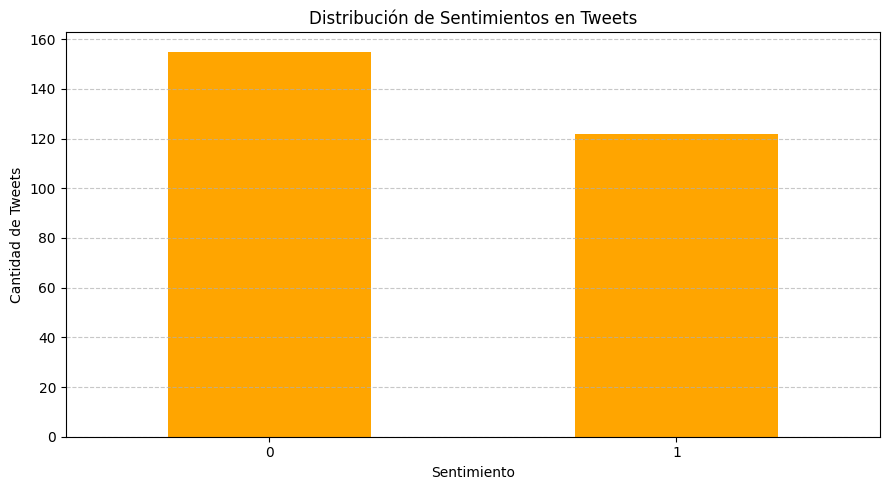

In [50]:
# Contar la cantidad de tweets por cada tipo de sentimiento
conteo_sentimientos = t_concat['sentimiento_predicho'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(9, 5))
conteo_sentimientos.plot(kind='bar', color='orange')
plt.title('Distribución de Sentimientos en Tweets')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Tweets')
plt.xticks(rotation=0)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


**b) ¿Qué variables son las más importantes del modelo?**

In [52]:
#!pip install eli5

In [53]:
#pip install --upgrade eli5 scikit-learn

In [54]:
#pip show eli5

In [55]:
#pip uninstall eli5 scikit-learn

In [58]:
pip install eli5 scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
import eli5

ImportError: cannot import name 'if_delegate_has_method' from 'sklearn.utils.metaestimators' (c:\Users\bego_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\metaestimators.py)

In [ ]:
eli5.show_weights(estimator= pipeline['clasiffier'],
                  feature_names= pipeline['vectorizer'].get_feature_names_out(),
                  top=100)

NameError: name 'eli5' is not defined

**c) ¿Cómo podrías mejorar el modelo?**

In [ ]:
# No entiendo si tengo que HACER o solo responder, pero no sabría cómo hacerlo

- Feature engineering, inclusión de nuevas características relevantes, buscar la información que faltaba (NaN).

- Limpiar y procesar adecuadamente los textos eliminando stop words, normalización de texto, corrección de errores tipográficos...

- Probar con otros modelos, Random Forest, SVM, Redes Neuronales... y ajustar hiperparámetros.

- Aumentar el conjunto de datos con más ejemplos.

- Validación cruzada y métricas de evaluación adecuadas para comprender mejor cómo se desempeña el modelo.

- Técnicas de ensemble como Bagging, Boosting o modelos apilados para combinar múltiples modelos y mejorar la generalización.

- Estudiar los errores cometidos por el modelo.

**d) ¿Qué otras oportunidades se te ocurren donde se podrían aplicar otros modelos de ML?**

- Predicción de Precios: Aplicar modelos de regresión para predecir precios en mercados financieros, o cualquier otra predicción de valores continuos.

- Clasificación de Imágenes y Videos: Utilizar modelos de redes neuronales convolucionales (CNN) para clasificar imágenes y videos en diferentes categorías, detección de objetos, reconocimiento facial, entre otros.

- Clasificación de Temas en Textos: Utilizar modelos de clasificación como Support Vector Machines (SVM), Redes Neuronales, o árboles de decisión para clasificar documentos de texto en diferentes categorías o temas.

- Recomendación de Contenido: Emplear modelos de filtrado colaborativo o algoritmos basados en contenido para sistemas de recomendación, por ejemplo, recomendaciones de productos, películas, música o contenido en plataformas en línea.

etc.